### 1. 加载数据集


In [4]:
from datasets import load_dataset
from transformers import MarianTokenizer
from datasets import Dataset
import html

def preprocess_text(text):
    # 转换HTML实体
    text = html.unescape(text)
    return text

tokenizer = MarianTokenizer.from_pretrained('Helsinki-NLP/opus-mt-en-zh', cache_dir='./checkpoints')

def load_and_preprocess_data(file_path_zh, file_path_en):
    with open(file_path_zh, 'r', encoding='utf-8') as zh_file, open(file_path_en, 'r', encoding='utf-8') as en_file:
        zh_lines = [preprocess_text(line.strip()) for line in zh_file.readlines()]
        en_lines = [preprocess_text(line.strip()) for line in en_file.readlines()]

    assert len(zh_lines) == len(en_lines), "Mismatch in number of lines between source and target files."
    
    tokenized_data = tokenizer(
        text=en_lines, 
        text_target=zh_lines, 
        max_length=512, 
        truncation=True, 
        padding="max_length", 
        return_tensors="pt"
    )
    
    dataset = Dataset.from_dict({
        'input_ids': tokenized_data['input_ids'],
        'attention_mask': tokenized_data['attention_mask'],
        'labels': tokenized_data['labels']
    })
    return dataset


train_dataset = load_and_preprocess_data('train_zh.txt', 'train_en.txt')
eval_dataset = load_and_preprocess_data('dev_zh.txt', 'dev_en.txt')
test_dataset = load_and_preprocess_data('test_zh.txt', 'test_en.txt')
print("len(train_dataset): ", len(train_dataset))
print("len(eval_dataset): ", len(eval_dataset))
print("len(test_dataset): ", len(test_dataset))

len(train_dataset):  50000
len(eval_dataset):  1000
len(test_dataset):  1000


### 2. 模型训练与评估

d:\miniconda\envs\torchdata\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
  2%|▎         | 500/20000 [02:11<2:28:59,  2.18it/s]

{'loss': 0.2077, 'grad_norm': 0.8000918030738831, 'learning_rate': 2.925e-05, 'epoch': 0.05}


                                                     
  2%|▎         | 500/20000 [02:40<2:28:59,  2.18it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.15173983573913574, 'eval_runtime': 28.3776, 'eval_samples_per_second': 35.239, 'eval_steps_per_second': 35.239, 'epoch': 0.05}


  5%|▌         | 1000/20000 [05:37<2:44:28,  1.93it/s]

{'loss': 0.1484, 'grad_norm': 0.5077909231185913, 'learning_rate': 2.8499999999999998e-05, 'epoch': 0.1}


                                                      
  5%|▌         | 1000/20000 [06:08<2:44:28,  1.93it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.1454867273569107, 'eval_runtime': 31.7737, 'eval_samples_per_second': 31.473, 'eval_steps_per_second': 31.473, 'epoch': 0.1}


  8%|▊         | 1500/20000 [08:23<1:17:01,  4.00it/s] 

{'loss': 0.1446, 'grad_norm': 0.6033354997634888, 'learning_rate': 2.7750000000000004e-05, 'epoch': 0.15}


                                                      
  8%|▊         | 1500/20000 [08:44<1:17:01,  4.00it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.14213646948337555, 'eval_runtime': 21.0622, 'eval_samples_per_second': 47.478, 'eval_steps_per_second': 47.478, 'epoch': 0.15}


 10%|█         | 2000/20000 [10:54<1:14:52,  4.01it/s] 

{'loss': 0.142, 'grad_norm': 0.5336238741874695, 'learning_rate': 2.7000000000000002e-05, 'epoch': 0.2}


                                                      
 10%|█         | 2000/20000 [11:15<1:14:52,  4.01it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.13967172801494598, 'eval_runtime': 20.9318, 'eval_samples_per_second': 47.774, 'eval_steps_per_second': 47.774, 'epoch': 0.2}


 12%|█▎        | 2500/20000 [13:22<1:12:59,  4.00it/s] 

{'loss': 0.1407, 'grad_norm': 0.6235578656196594, 'learning_rate': 2.625e-05, 'epoch': 0.25}


                                                      
 12%|█▎        | 2500/20000 [13:42<1:12:59,  4.00it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.13780170679092407, 'eval_runtime': 20.1852, 'eval_samples_per_second': 49.541, 'eval_steps_per_second': 49.541, 'epoch': 0.25}


 15%|█▌        | 3000/20000 [15:51<1:12:22,  3.91it/s] 

{'loss': 0.1357, 'grad_norm': 0.998388409614563, 'learning_rate': 2.55e-05, 'epoch': 0.3}


                                                      
 15%|█▌        | 3000/20000 [16:13<1:12:22,  3.91it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.1361161768436432, 'eval_runtime': 21.971, 'eval_samples_per_second': 45.515, 'eval_steps_per_second': 45.515, 'epoch': 0.3}


 18%|█▊        | 3500/20000 [18:24<1:08:50,  4.00it/s] 

{'loss': 0.1325, 'grad_norm': 0.5254808068275452, 'learning_rate': 2.475e-05, 'epoch': 0.35}


                                                      
 18%|█▊        | 3500/20000 [18:48<1:08:50,  4.00it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.1353214979171753, 'eval_runtime': 23.7282, 'eval_samples_per_second': 42.144, 'eval_steps_per_second': 42.144, 'epoch': 0.35}


 20%|██        | 4000/20000 [20:56<1:05:30,  4.07it/s] 

{'loss': 0.1322, 'grad_norm': 0.5553193688392639, 'learning_rate': 2.4e-05, 'epoch': 0.4}


                                                      
 20%|██        | 4000/20000 [21:17<1:05:30,  4.07it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.13357655704021454, 'eval_runtime': 20.0965, 'eval_samples_per_second': 49.76, 'eval_steps_per_second': 49.76, 'epoch': 0.4}


 22%|██▎       | 4500/20000 [23:21<1:02:38,  4.12it/s] 

{'loss': 0.1293, 'grad_norm': 0.6712188720703125, 'learning_rate': 2.3250000000000003e-05, 'epoch': 0.45}


                                                      
 22%|██▎       | 4500/20000 [23:43<1:02:38,  4.12it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.13311778008937836, 'eval_runtime': 22.266, 'eval_samples_per_second': 44.912, 'eval_steps_per_second': 44.912, 'epoch': 0.45}


 25%|██▌       | 5000/20000 [25:55<1:01:48,  4.05it/s] 

{'loss': 0.1296, 'grad_norm': 0.48091259598731995, 'learning_rate': 2.25e-05, 'epoch': 0.5}


                                                      
 25%|██▌       | 5000/20000 [26:16<1:01:48,  4.05it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.13216359913349152, 'eval_runtime': 21.6359, 'eval_samples_per_second': 46.219, 'eval_steps_per_second': 46.219, 'epoch': 0.5}


 28%|██▊       | 5500/20000 [28:23<59:44,  4.05it/s]   

{'loss': 0.1284, 'grad_norm': 0.4282098114490509, 'learning_rate': 2.175e-05, 'epoch': 0.55}


                                                    
 28%|██▊       | 5500/20000 [28:45<59:44,  4.05it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.13145087659358978, 'eval_runtime': 21.8987, 'eval_samples_per_second': 45.665, 'eval_steps_per_second': 45.665, 'epoch': 0.55}


 30%|███       | 6000/20000 [31:02<1:00:12,  3.88it/s] 

{'loss': 0.1276, 'grad_norm': 0.5717157125473022, 'learning_rate': 2.1e-05, 'epoch': 0.6}


                                                      
 30%|███       | 6000/20000 [31:24<1:00:12,  3.88it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.13069164752960205, 'eval_runtime': 22.1668, 'eval_samples_per_second': 45.112, 'eval_steps_per_second': 45.112, 'epoch': 0.6}


 32%|███▎      | 6500/20000 [33:35<56:36,  3.97it/s]   

{'loss': 0.1204, 'grad_norm': 0.4981258511543274, 'learning_rate': 2.025e-05, 'epoch': 0.65}


                                                    
 32%|███▎      | 6500/20000 [33:56<56:36,  3.97it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.1300295740365982, 'eval_runtime': 21.7274, 'eval_samples_per_second': 46.025, 'eval_steps_per_second': 46.025, 'epoch': 0.65}


 35%|███▌      | 7000/20000 [36:06<59:24,  3.65it/s]   

{'loss': 0.124, 'grad_norm': 0.6067609190940857, 'learning_rate': 1.95e-05, 'epoch': 0.7}


                                                    
 35%|███▌      | 7000/20000 [36:29<59:24,  3.65it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.12986691296100616, 'eval_runtime': 22.4312, 'eval_samples_per_second': 44.581, 'eval_steps_per_second': 44.581, 'epoch': 0.7}


 38%|███▊      | 7500/20000 [38:43<53:11,  3.92it/s]   

{'loss': 0.1276, 'grad_norm': 0.7490229606628418, 'learning_rate': 1.8750000000000002e-05, 'epoch': 0.75}


                                                    
 38%|███▊      | 7500/20000 [39:05<53:11,  3.92it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.128708615899086, 'eval_runtime': 22.113, 'eval_samples_per_second': 45.222, 'eval_steps_per_second': 45.222, 'epoch': 0.75}


 40%|████      | 8000/20000 [41:16<48:40,  4.11it/s]   

{'loss': 0.1225, 'grad_norm': 0.3494546115398407, 'learning_rate': 1.8e-05, 'epoch': 0.8}


                                                    
 40%|████      | 8000/20000 [41:38<48:40,  4.11it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.1287233531475067, 'eval_runtime': 21.8273, 'eval_samples_per_second': 45.814, 'eval_steps_per_second': 45.814, 'epoch': 0.8}


 42%|████▎     | 8500/20000 [43:42<46:13,  4.15it/s]   

{'loss': 0.1252, 'grad_norm': 0.5513192415237427, 'learning_rate': 1.725e-05, 'epoch': 0.85}


                                                    
 42%|████▎     | 8500/20000 [44:05<46:13,  4.15it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.1282908171415329, 'eval_runtime': 22.3753, 'eval_samples_per_second': 44.692, 'eval_steps_per_second': 44.692, 'epoch': 0.85}


 45%|████▌     | 9000/20000 [46:16<45:05,  4.07it/s]   

{'loss': 0.1251, 'grad_norm': 0.9614136219024658, 'learning_rate': 1.65e-05, 'epoch': 0.9}


                                                    
 45%|████▌     | 9000/20000 [46:39<45:05,  4.07it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.12819990515708923, 'eval_runtime': 22.5634, 'eval_samples_per_second': 44.32, 'eval_steps_per_second': 44.32, 'epoch': 0.9}


 48%|████▊     | 9500/20000 [48:49<51:49,  3.38it/s]   

{'loss': 0.1238, 'grad_norm': 0.5426916480064392, 'learning_rate': 1.575e-05, 'epoch': 0.95}


                                                    
 48%|████▊     | 9500/20000 [49:12<51:49,  3.38it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.12746457755565643, 'eval_runtime': 22.6817, 'eval_samples_per_second': 44.088, 'eval_steps_per_second': 44.088, 'epoch': 0.95}


 50%|█████     | 10000/20000 [51:18<41:46,  3.99it/s]  

{'loss': 0.1241, 'grad_norm': 0.4467290937900543, 'learning_rate': 1.5e-05, 'epoch': 1.0}


                                                     
 50%|█████     | 10000/20000 [51:39<41:46,  3.99it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.1268633008003235, 'eval_runtime': 20.3329, 'eval_samples_per_second': 49.181, 'eval_steps_per_second': 49.181, 'epoch': 1.0}


 52%|█████▎    | 10500/20000 [53:43<39:03,  4.05it/s]   

{'loss': 0.1088, 'grad_norm': 0.5455411076545715, 'learning_rate': 1.4249999999999999e-05, 'epoch': 1.05}


                                                     
 52%|█████▎    | 10500/20000 [54:04<39:03,  4.05it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.1265605390071869, 'eval_runtime': 20.5243, 'eval_samples_per_second': 48.723, 'eval_steps_per_second': 48.723, 'epoch': 1.05}


 55%|█████▌    | 11000/20000 [56:07<35:41,  4.20it/s]   

{'loss': 0.1083, 'grad_norm': 0.4290960133075714, 'learning_rate': 1.3500000000000001e-05, 'epoch': 1.1}


                                                     
 55%|█████▌    | 11000/20000 [56:28<35:41,  4.20it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.1266377717256546, 'eval_runtime': 21.0907, 'eval_samples_per_second': 47.414, 'eval_steps_per_second': 47.414, 'epoch': 1.1}


 57%|█████▊    | 11500/20000 [58:28<33:50,  4.19it/s]   

{'loss': 0.1075, 'grad_norm': 0.6752662658691406, 'learning_rate': 1.275e-05, 'epoch': 1.15}


                                                     
 57%|█████▊    | 11500/20000 [58:49<33:50,  4.19it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.12670592963695526, 'eval_runtime': 21.0161, 'eval_samples_per_second': 47.583, 'eval_steps_per_second': 47.583, 'epoch': 1.15}


 60%|██████    | 12000/20000 [1:00:51<31:36,  4.22it/s] 

{'loss': 0.108, 'grad_norm': 0.4474817216396332, 'learning_rate': 1.2e-05, 'epoch': 1.2}


                                                       
 60%|██████    | 12000/20000 [1:01:12<31:36,  4.22it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.12615971267223358, 'eval_runtime': 21.2783, 'eval_samples_per_second': 46.996, 'eval_steps_per_second': 46.996, 'epoch': 1.2}


 62%|██████▎   | 12500/20000 [1:03:13<29:39,  4.21it/s]   

{'loss': 0.1076, 'grad_norm': 0.4849366247653961, 'learning_rate': 1.125e-05, 'epoch': 1.25}


                                                       
 62%|██████▎   | 12500/20000 [1:03:33<29:39,  4.21it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.12598015367984772, 'eval_runtime': 19.9068, 'eval_samples_per_second': 50.234, 'eval_steps_per_second': 50.234, 'epoch': 1.25}


 65%|██████▌   | 13000/20000 [1:05:34<27:42,  4.21it/s]   

{'loss': 0.106, 'grad_norm': 0.619045615196228, 'learning_rate': 1.05e-05, 'epoch': 1.3}


                                                       
 65%|██████▌   | 13000/20000 [1:05:54<27:42,  4.21it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.12564782798290253, 'eval_runtime': 20.0857, 'eval_samples_per_second': 49.787, 'eval_steps_per_second': 49.787, 'epoch': 1.3}


 68%|██████▊   | 13500/20000 [1:07:55<25:43,  4.21it/s]   

{'loss': 0.1095, 'grad_norm': 0.7022021412849426, 'learning_rate': 9.75e-06, 'epoch': 1.35}


                                                       
 68%|██████▊   | 13500/20000 [1:08:16<25:43,  4.21it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.12547315657138824, 'eval_runtime': 21.0303, 'eval_samples_per_second': 47.55, 'eval_steps_per_second': 47.55, 'epoch': 1.35}


 70%|███████   | 14000/20000 [1:10:17<23:59,  4.17it/s]   

{'loss': 0.1079, 'grad_norm': 0.418114572763443, 'learning_rate': 9e-06, 'epoch': 1.4}


                                                       
 70%|███████   | 14000/20000 [1:10:39<23:59,  4.17it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.12512074410915375, 'eval_runtime': 21.432, 'eval_samples_per_second': 46.659, 'eval_steps_per_second': 46.659, 'epoch': 1.4}


 72%|███████▎  | 14500/20000 [1:12:39<21:59,  4.17it/s]   

{'loss': 0.1082, 'grad_norm': 0.3991372585296631, 'learning_rate': 8.25e-06, 'epoch': 1.45}


                                                       
 72%|███████▎  | 14500/20000 [1:13:00<21:59,  4.17it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.125082328915596, 'eval_runtime': 21.3372, 'eval_samples_per_second': 46.866, 'eval_steps_per_second': 46.866, 'epoch': 1.45}


 75%|███████▌  | 15000/20000 [1:15:05<20:39,  4.03it/s]   

{'loss': 0.1051, 'grad_norm': 0.574698269367218, 'learning_rate': 7.5e-06, 'epoch': 1.5}


                                                       
 75%|███████▌  | 15000/20000 [1:15:27<20:39,  4.03it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.1251250058412552, 'eval_runtime': 22.0188, 'eval_samples_per_second': 45.416, 'eval_steps_per_second': 45.416, 'epoch': 1.5}


 78%|███████▊  | 15500/20000 [1:17:31<18:31,  4.05it/s]   

{'loss': 0.1065, 'grad_norm': 0.6749964952468872, 'learning_rate': 6.750000000000001e-06, 'epoch': 1.55}


                                                       
 78%|███████▊  | 15500/20000 [1:17:52<18:31,  4.05it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.12442626804113388, 'eval_runtime': 21.1778, 'eval_samples_per_second': 47.219, 'eval_steps_per_second': 47.219, 'epoch': 1.55}


 80%|████████  | 16000/20000 [1:19:58<16:17,  4.09it/s]  

{'loss': 0.1076, 'grad_norm': 0.5547854900360107, 'learning_rate': 6e-06, 'epoch': 1.6}


                                                       
 80%|████████  | 16000/20000 [1:20:20<16:17,  4.09it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.12425351142883301, 'eval_runtime': 21.9038, 'eval_samples_per_second': 45.654, 'eval_steps_per_second': 45.654, 'epoch': 1.6}


 82%|████████▎ | 16500/20000 [1:22:21<14:03,  4.15it/s]  

{'loss': 0.1085, 'grad_norm': 0.3126097619533539, 'learning_rate': 5.25e-06, 'epoch': 1.65}


                                                       
 82%|████████▎ | 16500/20000 [1:22:43<14:03,  4.15it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.12433093786239624, 'eval_runtime': 21.4269, 'eval_samples_per_second': 46.67, 'eval_steps_per_second': 46.67, 'epoch': 1.65}


 85%|████████▌ | 17000/20000 [1:24:45<11:57,  4.18it/s]  

{'loss': 0.1075, 'grad_norm': 0.7132046222686768, 'learning_rate': 4.5e-06, 'epoch': 1.7}


                                                       
 85%|████████▌ | 17000/20000 [1:25:06<11:57,  4.18it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.12392359972000122, 'eval_runtime': 21.3979, 'eval_samples_per_second': 46.734, 'eval_steps_per_second': 46.734, 'epoch': 1.7}


 88%|████████▊ | 17500/20000 [1:27:07<09:54,  4.20it/s]  

{'loss': 0.1071, 'grad_norm': 0.7637417912483215, 'learning_rate': 3.75e-06, 'epoch': 1.75}


                                                       
 88%|████████▊ | 17500/20000 [1:27:29<09:54,  4.20it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.12380371987819672, 'eval_runtime': 21.322, 'eval_samples_per_second': 46.9, 'eval_steps_per_second': 46.9, 'epoch': 1.75}


 90%|█████████ | 18000/20000 [1:29:30<07:56,  4.20it/s]  

{'loss': 0.1052, 'grad_norm': 0.4522033929824829, 'learning_rate': 3e-06, 'epoch': 1.8}


                                                       
 90%|█████████ | 18000/20000 [1:29:52<07:56,  4.20it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.12373536825180054, 'eval_runtime': 21.7622, 'eval_samples_per_second': 45.951, 'eval_steps_per_second': 45.951, 'epoch': 1.8}


 92%|█████████▎| 18500/20000 [1:31:53<05:59,  4.17it/s]  

{'loss': 0.1052, 'grad_norm': 0.49465468525886536, 'learning_rate': 2.25e-06, 'epoch': 1.85}


                                                       
 92%|█████████▎| 18500/20000 [1:32:14<05:59,  4.17it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.12363345175981522, 'eval_runtime': 20.8538, 'eval_samples_per_second': 47.953, 'eval_steps_per_second': 47.953, 'epoch': 1.85}


 95%|█████████▌| 19000/20000 [1:34:16<03:59,  4.18it/s]  

{'loss': 0.1065, 'grad_norm': 0.38149935007095337, 'learning_rate': 1.5e-06, 'epoch': 1.9}


                                                       
 95%|█████████▌| 19000/20000 [1:34:37<03:59,  4.18it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.12355425953865051, 'eval_runtime': 20.6876, 'eval_samples_per_second': 48.338, 'eval_steps_per_second': 48.338, 'epoch': 1.9}


 98%|█████████▊| 19500/20000 [1:36:38<01:59,  4.18it/s]  

{'loss': 0.1062, 'grad_norm': 0.3823511004447937, 'learning_rate': 7.5e-07, 'epoch': 1.95}


                                                       
 98%|█████████▊| 19500/20000 [1:36:59<01:59,  4.18it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.12339402735233307, 'eval_runtime': 20.453, 'eval_samples_per_second': 48.893, 'eval_steps_per_second': 48.893, 'epoch': 1.95}


100%|██████████| 20000/20000 [1:39:00<00:00,  4.19it/s]

{'loss': 0.1059, 'grad_norm': 0.5541286468505859, 'learning_rate': 0.0, 'epoch': 2.0}


                                                       
100%|██████████| 20000/20000 [1:39:21<00:00,  4.19it/s]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[65000]], 'forced_eos_token_id': 0}


{'eval_loss': 0.12337365001440048, 'eval_runtime': 20.5266, 'eval_samples_per_second': 48.717, 'eval_steps_per_second': 48.717, 'epoch': 2.0}


100%|██████████| 20000/20000 [1:39:22<00:00,  3.35it/s]

{'train_runtime': 5962.44, 'train_samples_per_second': 16.772, 'train_steps_per_second': 3.354, 'train_loss': 0.1208592140197754, 'epoch': 2.0}


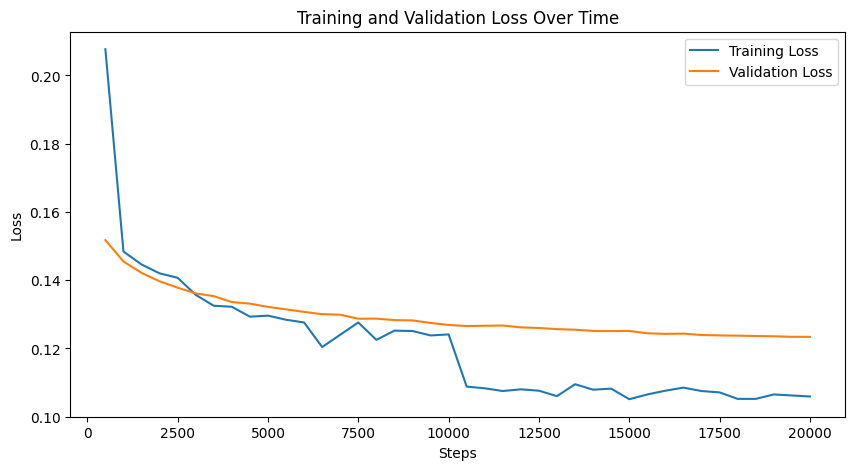

100%|██████████| 1000/1000 [00:20<00:00, 48.71it/s]

Evaluation Result: {'eval_loss': 0.12337365001440048, 'eval_runtime': 20.5452, 'eval_samples_per_second': 48.673, 'eval_steps_per_second': 48.673, 'epoch': 2.0}


In [3]:
from transformers import MarianMTModel, Trainer, TrainingArguments, TrainerCallback, MarianTokenizer
import matplotlib.pyplot as plt
from datasets import Dataset
import sacrebleu
import numpy as np
import torch
import gc

# 加载预训练的Marian模型和分词器
model_name = 'Helsinki-NLP/opus-mt-en-zh'
model = MarianMTModel.from_pretrained(model_name, cache_dir='./checkpoints')

class TranslationLoggingCallback(TrainerCallback):
    def __init__(self):
        super().__init__()
        self.train_losses = []
        self.eval_losses = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        """在训练和评估过程中记录损失值"""
        if logs is not None:
            if 'loss' in logs:
                self.train_losses.append((state.global_step, logs['loss']))
            if 'eval_loss' in logs:
                self.eval_losses.append((state.global_step, logs['eval_loss']))

    

def train_and_evaluate(model, tokenizer, train_dataset, eval_dataset):
    logging_callback = TranslationLoggingCallback()

    training_args = TrainingArguments(
        output_dir='./results',
        eval_strategy="steps",
        eval_steps=500,
        learning_rate=3e-5,
        per_device_train_batch_size=5,
        per_device_eval_batch_size=1, 
        num_train_epochs=2,
        weight_decay=0.01,
        save_steps=500,
        save_total_limit=1,
        logging_dir='./logs',
        logging_steps=500,
        bf16=True,  # 用混合精度训练
        gradient_accumulation_steps=1,  # 梯度累积步数
    )
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=eval_dataset,
        # compute_metrics=compute_metrics,
        callbacks=[logging_callback]
    )

    trainer.train()

    train_steps, train_losses = zip(*logging_callback.train_losses)
    eval_steps, eval_losses = zip(*logging_callback.eval_losses)

    plt.figure(figsize=(10, 5))
    plt.plot(train_steps, train_losses, label='Training Loss')
    plt.plot(eval_steps, eval_losses, label='Validation Loss')
    plt.title('Training and Validation Loss Over Time')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    torch.cuda.empty_cache()  # 清除缓存以释放显存

    eval_result = trainer.evaluate()
    print(f"Evaluation Result: {eval_result}")

train_and_evaluate(model, tokenizer, train_dataset, eval_dataset)


In [5]:
from transformers import DataCollatorForSeq2Seq
from transformers import MarianMTModel, MarianTokenizer
from tqdm import tqdm
import torch
import numpy as np
import sacrebleu

test_model_path = './results/checkpoint-20000'
test_model = MarianMTModel.from_pretrained(test_model_path)
tokenizer = MarianTokenizer.from_pretrained('Helsinki-NLP/opus-mt-en-zh', cache_dir='./checkpoints')

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    decoded_preds = []
    decoded_labels = []

    # 分块解码以减少显存消耗
    chunk_size = 1  # 适当调整块大小
    for i in range(0, len(preds), chunk_size):
        preds_chunk = preds[i:i + chunk_size]
        labels_chunk = labels[i:i + chunk_size]
        with torch.no_grad():
            decoded_preds_chunk = tokenizer.batch_decode(preds_chunk, skip_special_tokens=True)
            decoded_labels_chunk = tokenizer.batch_decode(
                np.where(labels_chunk != -100, labels_chunk, tokenizer.pad_token_id), 
                skip_special_tokens=True
            )

        decoded_preds.extend(decoded_preds_chunk)
        decoded_labels.extend(decoded_labels_chunk)

    # 分批计算 BLEU 分数
    bleu_scores = []
    for i in range(0, len(decoded_preds), chunk_size):
        with torch.no_grad():
            bleu = sacrebleu.corpus_bleu(decoded_preds[i:i + chunk_size], [decoded_labels[i:i + chunk_size]])
        bleu_scores.append(bleu.score)

    avg_bleu = np.mean(bleu_scores)
    return {"bleu": avg_bleu}


def evaluate_model_on_test_set(model, tokenizer, test_dataset):
    data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)
    test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=2, collate_fn=data_collator)
    all_preds, all_labels = [], []

    model.eval()  # 设置模型为评估模式
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    for batch in tqdm(test_dataloader, desc="Testing: "):
        input_ids = batch['input_ids'].to(device)
        labels = batch['labels'].to(device)

        with torch.no_grad():
            outputs = model.generate(input_ids)
            all_preds.extend(outputs.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    eval_result = compute_metrics((all_preds, all_labels))
    print(f"Test BLEU Score: {eval_result['bleu']}")


evaluate_model_on_test_set(test_model, tokenizer, test_dataset)


Testing: 100%|██████████| 500/500 [05:12<00:00,  1.60it/s]


Test BLEU Score: 15.685620435946324


In [8]:
import torch
from transformers import MarianMTModel, MarianTokenizer

# 加载模型和标记器
test_model_path = './results/checkpoint-20000'
model = MarianMTModel.from_pretrained(test_model_path)
tokenizer = MarianTokenizer.from_pretrained('Helsinki-NLP/opus-mt-en-zh', cache_dir='./checkpoints')

# 示例英文句子和对应的正确答案
examples = [
    ("I knew what it would mean for my friends .", "我知道它对我的朋友们而言意味着什么。"),
    ("The weather is nice today.", "今天天气很好。"),
    ("How are you?", "你好吗？"),
    ("This is a test sentence.", "这是一个测试句子。"),
    ("it would have taken them 10 minutes to get to the scene .", "他们 赶到 现场 需要 10 分钟 。")
]

# 翻译句子并打印结果
def translate_and_compare(model, tokenizer, examples):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    for idx, (eng_sentence, correct_translation) in enumerate(examples):
        inputs = tokenizer(eng_sentence, return_tensors="pt", padding=True).to(device)

        with torch.no_grad():
            translated_tokens = model.generate(**inputs)
            translated_sentence = tokenizer.batch_decode(translated_tokens, skip_special_tokens=True)[0]

        print(f"Example {idx + 1}:")
        print(f"English Sentence: {eng_sentence}")
        print(f"Correct Translation: {correct_translation}")
        print(f"Model Translation: {translated_sentence}")
        print()

translate_and_compare(model, tokenizer, examples)


Example 1:
English Sentence: I knew what it would mean for my friends .
Correct Translation: 我知道它对我的朋友们而言意味着什么。
Model Translation: 我 知道 这 对 我 的 朋友 意味着 什么 。

Example 2:
English Sentence: The weather is nice today.
Correct Translation: 今天天气很好。
Model Translation: 今天 天气 不错 。

Example 3:
English Sentence: How are you?
Correct Translation: 你好吗？
Model Translation: 你 怎么样?

Example 4:
English Sentence: This is a test sentence.
Correct Translation: 这是一个测试句子。
Model Translation: 这是 一个 考验性 的 句子 。

Example 5:
English Sentence: it would have taken them 10 minutes to get to the scene .
Correct Translation: 他们 赶到 现场 需要 10 分钟 。
Model Translation: 他们 需要 10 分钟 才能 到达 现场 。

